In [1]:
# packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 999

display(HTML("<style>.container {width:90% !important;}</style>"))
sys.path.append("/Users/mariapalafox/Desktop/Toolbox")
from all_funx import *
from maplib import *

# filtering CADD maxmean and pos_specific files with detected/not pos_ids (dbNSFP final accounting)

In [5]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-

# Pmap_filteron_posID.py
# GOAL filtering already made CADD maxmean score files with detected and not detecte Cys and Lys positions for map paper. using updated count of uniprot IDs as 3,840 (number shared post dbNSFP mapping)

def filter_by_col(df, outname, fil, filcol):
    fil_list = fil[filcol].tolist()
    filtered = addcolumnconditionalDrop(fil_list, df, filcol, 'in_set')
    print("filter file shape: ", filtered.shape)
#     filtered.to_csv(outname, index=False)
    return filtered

os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/RESULT_CADDv14_pos_overlap_dbNSFPcoordinates/")

# search files with pos_ID (ukbid_aapos)
detfilter = "PULL_annotations/SEARCH_hg19_DETECTED_104475.csv"
notfilter = "PULL_annotations/SEARCH_hg19_NOT_DETECTED_1222911.csv"
detfil = pd.read_csv(detfilter, usecols=['pos_ID'])
notfil = pd.read_csv(notfilter, usecols=['pos_ID'])
detfil.drop_duplicates(keep='first', inplace=True)
notfil.drop_duplicates(keep='first', inplace=True)
print("detected post drop duplicate shape of df: ", detfil.shape)
print("not detected post drop duplicate shape: ", notfil.shape)
print(detfil.head(2))
print()
print(notfil.head(2))

# saving non redundant on pos_ID search files
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/BUG_FIX/NOT_3840_FILTERED")
# detfil.to_csv("FILTER_detected_pos_ID_14925.csv", index=False)
# notfil.to_csv("FILTER_notdetected_pos_ID_174702.csv", index=False)

# Knot = pd.read_csv("CADDspecific_K_notdetected_1015295x2rows.csv")
# Cnot = pd.read_csv("CADDspecific_C_notdetected_244506x2rows.csv")
# Kdet = pd.read_csv("CADDspecific_K_detected_63014x2rows.csv")
# Cdet = pd.read_csv("CADDspecific_C_detected_43050x2rows.csv")

Knot3 = pd.read_csv("POSspecific_K_notdetected_maxmean_145027x2pos.csv")
Cnot3 = pd.read_csv("POSspecific_C_notdetected_maxmean_34930x2pos.csv")
Kdet3 = pd.read_csv("POSspecific_K_detected_maxmean_9002x2pos.csv")
Cdet3 = pd.read_csv("POSspecific_C_detected_maxmean_6150x2pos.csv")

# notcols = ['pos_id19', 'pos_id38', 'xref', 'matched_target', 'lost_amino',
#        'gained_amino', 'Amino_acids', 'pos_ID',
#        'geneNamePrimary', 'CADD_score', 'assembly']
# Knot.columns = notcols
# Cnot.columns = notcols

Knot3.columns = ['pos_ID', 'xref', 'geneNamePrimary', 'CADD_avg', 'CADD_max', 'assembly']

Cnot3.columns = ['pos_ID', 'xref', 'geneNamePrimary', 'CADD_avg', 'CADD_max', 'assembly']

Kdet3.columns = ['pos_ID', 'xref', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'geneNamePrimary', 'CADD_avg', 'CADD_max', 'assembly']

Cdet3.columns = ['pos_ID', 'xref', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'geneNamePrimary', 'CADD_avg', 'CADD_max','assembly']

dfls = [Knot3, Cnot3, Kdet3, Cdet3]
for i in dfls:
    print(i.columns)
    print()
    
# K detected 
Kdet2 = pd.merge(Kdet, detfil, how='inner', on=['pos_ID'])
# C detected 
Cdet2 = pd.merge(Cdet, detfil, how = 'inner', on=['pos_ID'])

 # K not detected
Knot2 = pd.merge(Knot, notfil, how='inner', on=['pos_ID'])

# C not detected 
Cnot2 = pd.merge(Cnot, notfil, how='inner', on=['pos_ID'])

# K detected 
Kdet4 = pd.merge(Kdet3, detfil, how='inner', on=['pos_ID'])
# C detected 
Cdet4 = pd.merge(Cdet3, detfil, how = 'inner', on=['pos_ID'])

 # K not detected
Knot4 = pd.merge(Knot3, notfil, how='inner', on=['pos_ID'])

# C not detected 
Cnot4 = pd.merge(Cnot3, notfil, how='inner', on=['pos_ID'])

Knot2.to_csv("CADDspecific_K_notdetected_1222911x2.csv")
Cnot2.to_csv("CADDspecific_C_notdetected_1222911x2.csv")
Kdet2.to_csv("CADDspecific_K_detected_104474x2.csv")
Cdet2.to_csv("CADDspecific_C_detected_104474x2.csv")

Knot4.to_csv("POSspecific_K_notdetected_maxmean_140652x2.csv")
Cnot4.to_csv("POSspecific_C_notdetected_maxmean_34050x2.csv")
Kdet4.to_csv("POSspecific_K_detected_maxmean_8868x2.csv")
Cdet4.to_csv("POSspecific_C_detected_maxmean_6057x2.csv")

detected post drop duplicate shape of df:  (14925, 1)
not detected post drop duplicate shape:  (174702, 1)
        pos_ID
0  Q3ZCM7_C354
7  Q3ZCM7_C303

        pos_ID
0  Q3ZCM7_K392
7  Q3ZCM7_K379


# table comparing columns (regional, conservation, and mutation density) between hg19 and hg38

**MERGE file has CADD columns specific to each assembly, comparing these values for same set of detected coordinates**

In [2]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES/")

In [3]:
detmerge = pd.read_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475.csv", low_memory=False)
detdescribe = detmerge.describe()
# detdescribe.to_csv("MERGE_DET_DESCRIBE.csv")
detdescribe

,matched_aapos,matched_index,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Lys_reactivity,codonpos,codon_degeneracy,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,RawScore_hg19,PHRED_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38,RawScore_hg38,PHRED_hg38
count,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,9807.000000,30541.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104468.000000,104468.000000,104475.000000,104475.000000,104475.000000,104475.000000,101659.000000,1.016590e+05,104475.000000,104475.000000,104447.000000,102421.000000,102421.000000,102421.000000,104195.000000,104195.000000,104195.000000,104363.000000,104363.000000,104363.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,87399.000000,8.739900e+04,69168.000000,69168.000000,104447.000000,104193.000000,104193.000000,104193.000000,104342.000000,104342.000000,104342.000000,104440.000000,104440.000000,104440.000000,104239.000000,104398.000000
mean,351.526767,0.453362,25.305605,24.054814,1.250791,5.962427,7.897548,1.884049,0.455477,0.950433,0.573223,0.853870,0.620534,0.493464,0.053595,0.820250,0.910806,0.925576,0.403298,1.561640,2.959281,1064.140482,1.137043e-09,5.249858,3.970090,146.598055,0.091807,0.408871,5.407797,1.664869,5.637747,60.205279,18.727882,61.593419,610.080852,3.094321,24.054814,0.493466,0.053596,0.846978,0.922099,0.908942,0.390775,2.405932,4.983427,2753.385220,1.963920e-08,17.276933,4.992742,32.283215,0.089248,0.394259,12.373816,1.648377,5.548360,138.869717,18.450814,60.063194,1398.902911,5.055787,25.681465
std,512.694518,1.022412,4.572920,5.265911,2.662344,3.201143,3.019020,0.746987,0.838750,0.120271,0.274230,0.234544,0.232996,0.111192,0.052717,0.292555,0.252015,0.239505,0.342720,0.970815,1.882928,1289.474104,3.161568e-08,0.657889,2.455545,3858.878754,0.311276,0.672054,3.044166,1.762804,3.070884,18.368963,11.695135,18.339498,132.626749,0.991271,5.265911,0.111193,0.052721,0.262146,0.242784,0.268523,0.297954,1.393662,3.256797,3207.141926,3.171466e-07,2.995495,15.948119,936.091690,0.305952,0.660648,5.314361,1.730947,2.998512,34.735991,11.257861,17.474961,257.630979,9.411403,13.357122
min,2.000000,0.000000,0.001000,0.001000,-16.700000,0.740000,0.100000,1.000000,0.000000,0.053246,0.000100,0.000200,0.002200,0.198675,0.000000,0.000000,0.000000,0.000000,-3.974000,-7.258000,-7.510000,21.300000,0.000000e+00,0.000000,-12.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.763825,0.001000,0.198675,0.000000,0.000000,0.000000,0.000000,-4.505000,-7.475000,-9.876000,38.600000,0.000000e+00,0.023900,-39.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,-1.260155,0.001000
25%,95.000000,0.000000,23.000000,22.600000,-0.200000,4.330000,5.800000,1.000000,0.000000,0.975998,0.348420,0.862360,0.454780,0.403974,0.013333,0.804000,0.995000,0.999000,0.450000,0.891000,1.318000,399.500000,4.094760e-162,4.950000,3.430000,20.000000,0.000000,0.000000,3.000000,0.000000,3.000000,49.000000,11.000000,49.000000,541.000000,2.504595,22.600000,0.403974,0.013333,0.853000,0.999000,1.000000,0.418000,1.442000,1.991000,810.270000,5.609950e-239,16.600000,1.560000,9.000000,0.000000,0

In [5]:
describeMe(detmerge)

(104475, 143)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'rs_dbSNP151', 'Ensembl_transcriptid', 'cds_strand',
       'refcodon', 'codonpos', 'codon_degeneracy', 'SIFT_score',
       'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score',
       'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred',
       'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore',
       'Polyphen2_HVAR_pred', 'LRT_score', 'LRT_converted_rankscore',
       'LRT_pred', 'LRT_Omega', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationTaster_model', 'MutationTaste

In [22]:
notmerge = pd.read_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911.csv", low_memory=False)
notdescribe = notmerge.describe()
notdescribe.to_csv("MERGE_NOT_DET_DESCRIBE.csv")
notdescribe

,matched_aapos,matched_index,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,codonpos,codon_degeneracy,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,RawScore_hg19,PHRED_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38,RawScore_hg38,PHRED_hg38
count,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222295e+06,1.222386e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.176465e+06,1.176465e+06,1.222911e+06,1.222911e+06,1.222813e+06,1.200332e+06,1.200332e+06,1.200332e+06,1.218886e+06,1.218886e+06,1.218886e+06,1.221504e+06,1.221504e+06,1.221504e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,1.222911e+06,975519.000000,9.755190e+05,833758.000000,833758.000000,1.222813e+06,1.218614e+06,1.218614e+06,1.218614e+06,1.220690e+06,1.220690e+06,1.220690e+06,1.221770e+06,1.221770e+06,1.221770e+06,1.219998e+06,1.221705e+06
mean,5.836535e+02,5.231157e-01,2.483800e+01,2.368670e+01,1.151298e+00,1.944314e+00,5.157415e-01,9.649924e-01,6.191601e-01,8.487947e-01,6.154347e-01,4.691585e-01,4.577942e-02,8.105581e-01,8.949235e-01,9.115622e-01,3.983268e-01,1.489742e+00,2.727851e+00,1.193011e+03,1.613463e-09,5.296934e+00,3.932253e+00,2.002318e+02,9.514118e-02,3.941784e-01,5.330149e+00,1.543009e+00,5.435625e+00,5.818956e+01,1.752573e+01,5.942298e+01,5.879453e+02,3.027769e+00,2.368670e+01,4.691633e-01,4.578305e-02,8.401337e-01,9.126092e-01,9.049701e-01,3.933915e-01,2.306422e+00,4.603930e+00,2864.042191,3.601145e-08,16.720907,4.461672,1.320300e+02,9.299335e-02,3.832354e-01,1.229661e+01,1.525687e+00,5.363333e+00,1.344446e+02,1.727325e+01,5.812791e+01,1.352162e+03,4.889462e+00,2.512746e+01
std,7.297596e+02,1.077767e+00,4.352148e+00,5.176653e+00,2.553702e+00,7.538747e-01,8.749253e-01,1.023950e-01,2.581124e-01,2.396390e-01,2.359077e-01,1.110680e-01,4.836456e-02,3.014940e-01,2.730537e-01,2.592152e-01,3.296597e-01,9.590988e-01,1.829380e+00,1.449384e+03,4.096409e-08,6.720650e-01,2.409105e+00,4.455956e+03,3.188209e-01,6.582110e-01,2.921418e+00,1.643730e+00,2.962822e+00,1.656973e+01,1.094995e+01,1.714999e+01,1.158487e+02,9.892404e-01,5.176653e+00,1.110721e-01,4.836684e-02,2.706356e-01,2.563623e-01,2.723857e-01,2.832095e-01,1.374961e+00,3.130790e+00,3682.070139,4.298103e-07,3.343195,15.927187,3.492033e+03,3.153929e-01,6.497582e-01,5.036613e+00,1.605644e+00,2.905735e+00,3.131652e+01,1.054991e+01,1.634640e+01,2.237886e+02,9.560255e+00,1.343203e+01
min,2.000000e+00,0.000000e+00,1.000000e-03,1.000000e-03,-2.340000e+01,1.000000e+00,0.000000e+00,3.724673e-02,1.000000e-05,1.000000e-05,4.400000e-04,1.788079e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.708000e+00,-7.484000e+00,-7.493000e+00,1.430000e+01,0.000000e+00,0.000000e+00,-1.230000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,-2.920076e+00,1.000000e-03,1.788079e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.914000e+00,-9.114000e+00,-1.393300e+01,23.120000,0.000000e+00,0.000000,-39.500000,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,-1.285149e+00,-7.724320e-01
25%,1.590000e+02,0.000000e+00,2.280000e+01,2.24000

## checking in null values in my files match CADD website for example input chr10 47330-47332...
- my null values for GERP match website. 
- conservation scores do not change if an annotation calls intergenic vs coding region (phyloP, PhCons..GERP)
- CADD scores do not change based on annotation from VEP also, **not sure why some PHRED score have null values but the CADD_phred scores from dbNSFP and pulled from CADD37 are correct**


In [21]:
# selects any rows if column value has nan
# simpledet[simpledet.isnull().any(axis=1)]

nullcadd = simpledet[simpledet.PHRED_hg38.isnull()]
nullcadd.head(10)

,pos_id19,pos_id38,pos_ID,CADD_phred_hg38,CADD_phred_hg19,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,RawScore_hg19,PHRED_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38,RawScore_hg38,PHRED_hg38
3997,10_106019518_A_C,10_104259760_A_C,P78417_K110,26.1,24.9,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,3.193,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,2.0,5.0,1.0,42.0,41.0,47.0,511.0,3.444523,24.9,0.437086,0.013333,0.989,1.000,1.0,0.475,3.370,5.173,2532.92,7.625010e-223,18.7,15.30,11.0,0.0,0.0,11.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
3998,10_106019518_A_G,10_104259760_A_G,P78417_K110,30.0,27.9,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,3.193,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,2.0,5.0,1.0,42.0,41.0,47.0,511.0,3.987084,27.9,0.437086,0.013333,0.989,1.000,1.0,0.475,3.370,5.173,2532.92,7.625010e-223,18.7,15.30,11.0,0.0,0.0,11.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
3999,10_106019519_A_C,10_104259761_A_C,P78417_K110,27.5,27.1,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,2.248,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.905629,27.1,0.437086,0.013333,0.990,1.000,1.0,0.475,2.018,4.639,2532.92,7.625010e-223,18.7,7.32,11.0,0.0,0.0,12.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
4000,10_106019519_A_G,10_104259761_A_G,P78417_K110,22.8,22.6,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,2.248,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,2.517407,22.6,0.437086,0.013333,0.990,1.000,1.0,0.475,2.018,4.639,2532.92,7.625010e-223,18.7,7.32,11.0,0.0,0.0,12.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
4001,10_106019519_A_T,10_104259761_A_T,P78417_K110,27.9,27.9,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,2.248,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.992958,27.9,0.437086,0.013333,0.990,1.000,1.0,0.475,2.018,4.639,2532.92,7.625010e-223,18.7,7.32,11.0,0.0,0.0,12.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
4002,10_106019520_A_C,10_104259762_A_C,P78417_K110,26.3,25.2,0.443709,0.013333,0.997,1.000,1.000,0.478,0.997,1.628,733.4,9.986630e-100,5.57,3.16,67.0,1.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.536724,25.2,0.443709,0.013333,0.989,0.999,1.0,0.475,0.418,1.283,2532.92,7.625010e-223,18.7,18.70,53.0,1.0,0.0,12.0,5.0,0.0,106.0,41.0,44.0,1213.0,NaN,NaN
4003,10_106019520_A_T,10_104259762_A_T,P78417_K110,26.2,25.2,0.443709,0.013333,0.997,1.000,1.000,0.478,0.997,1.628,733.4,9.986630e-100,5.57,3.16,67.0,1.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.542553,25.2,0.443709,0.013333,0.989,0.999,1.0,0.475,0.418,1.283,2532.92,7.625010e-223,18.7,18.70,53.0,1.0,0.0,12.0,5.0,0.0,106.0,41.0,44.0,1213.0,NaN,NaN
11599,11_101985094_A_C,11_102114363_A_C,P46937_K181,27.0,24.1,0.410596,0.013333,0.997,0.865,0.996,0.457,0.975,3.531,806.8,2.233160e-137,5.74,4.59,93.0,0.0,0.0,3.0,3.0,7.0,57.0,18.0,70.0,681.0,3.196711,24.1,0.410596,0.013333,0.986,0.986,1.0,0.475,3.339,6.735,2886.89,3.780080e-245,19.7,17.40,33.0,0.0,0.0,7.0,3.0,7.0,131.0,18.0,72.0,1576.0,NaN,NaN
11600,11_101985094_A_G,11_102114363_A_G,P46937_K181,28.5,24.4,0.410596,0.013333,0.997,0.865,0.996,0.457,0.975,3.531,806.8,2.233160e-137,5.74,4.59,93.0,0.0,0.0,3.0,3.0,7.0,57.0,18.0,70.0,681.0,3.277657,24.4,0.410596,0.013333,0.986,0.986,1.0,0.475,3.339,6.735,2886.89,3.780080e-245,19.7,17.40,33.0,0.0,0.0,7.0,3.0,7.0,131.0,18.0,72.0,1576.0,NaN,NaN
11601,11_101985095_A_C,11_102114364_A_C,P46937_K181,27.0,25.4,0.417219,0.013333,0.997,0.978,1.000,0.457,2.191,5.124,806.8,2.233160e-

In [71]:
keepmedet = ['pos_id19', 'pos_id38', 'pos_ID', 'CADD_phred_hg38', 'CADD_phred_hg19','GC_hg19', 'CpG_hg19', 'priPhCons_hg19',
       'mamPhCons_hg19', 'verPhCons_hg19', 'priPhyloP_hg19', 'mamPhyloP_hg19',
       'verPhyloP_hg19', 'GerpRS_hg19', 'GerpRSpval_hg19', 'GerpN_hg19',
       'GerpS_hg19', 'Dist2Mutation_hg19', 'Freq100bp_hg19', 'Rare100bp_hg19',
       'Sngl100bp_hg19', 'Freq1000bp_hg19', 'Rare1000bp_hg19',
       'Sngl1000bp_hg19', 'Freq10000bp_hg19', 'Rare10000bp_hg19',
       'Sngl10000bp_hg19', 'GC_hg38',
       'CpG_hg38', 'priPhCons_hg38', 'mamPhCons_hg38', 'verPhCons_hg38',
       'priPhyloP_hg38', 'mamPhyloP_hg38', 'verPhyloP_hg38', 'GerpRS_hg38',
       'GerpRSpval_hg38', 'GerpN_hg38', 'GerpS_hg38', 'Dist2Mutation_hg38',
       'Freq100bp_hg38', 'Rare100bp_hg38', 'Sngl100bp_hg38', 'Freq1000bp_hg38',
       'Rare1000bp_hg38', 'Sngl1000bp_hg38', 'Freq10000bp_hg38',
       'Rare10000bp_hg38', 'Sngl10000bp_hg38']


simpledet = detmerge[keepmedet].copy()
simplenot = notmerge[keepmedet].copy()

In [72]:
simpledet.isna().sum()

pos_id19                  0
pos_id38                  0
pos_ID                    0
CADD_phred_hg38           0
CADD_phred_hg19           0
GC_hg19                   0
CpG_hg19                  0
priPhCons_hg19            7
mamPhCons_hg19            7
verPhCons_hg19            0
priPhyloP_hg19            0
mamPhyloP_hg19            0
verPhyloP_hg19            0
GerpRS_hg19            2816
GerpRSpval_hg19        2816
GerpN_hg19                0
GerpS_hg19                0
Dist2Mutation_hg19       28
Freq100bp_hg19         2054
Rare100bp_hg19         2054
Sngl100bp_hg19         2054
Freq1000bp_hg19         280
Rare1000bp_hg19         280
Sngl1000bp_hg19         280
Freq10000bp_hg19        112
Rare10000bp_hg19        112
Sngl10000bp_hg19        112
GC_hg38                   0
CpG_hg38                  0
priPhCons_hg38            0
mamPhCons_hg38            0
verPhCons_hg38            0
priPhyloP_hg38            0
mamPhyloP_hg38            0
verPhyloP_hg38            0
GerpRS_hg38         

In [73]:
simplenot.isna().sum()

pos_id19                   0
pos_id38                   0
pos_ID                     0
CADD_phred_hg38            0
CADD_phred_hg19            0
GC_hg19                    0
CpG_hg19                   0
priPhCons_hg19           616
mamPhCons_hg19           525
verPhCons_hg19             0
priPhyloP_hg19             0
mamPhyloP_hg19             0
verPhyloP_hg19             0
GerpRS_hg19            46446
GerpRSpval_hg19        46446
GerpN_hg19                 0
GerpS_hg19                 0
Dist2Mutation_hg19        98
Freq100bp_hg19         22579
Rare100bp_hg19         22579
Sngl100bp_hg19         22579
Freq1000bp_hg19         4025
Rare1000bp_hg19         4025
Sngl1000bp_hg19         4025
Freq10000bp_hg19        1407
Rare10000bp_hg19        1407
Sngl10000bp_hg19        1407
GC_hg38                    0
CpG_hg38                   0
priPhCons_hg38             0
mamPhCons_hg38             0
verPhCons_hg38             0
priPhyloP_hg38             0
mamPhyloP_hg38             0
verPhyloP_hg38

# merging simplified detected and not DF's to create stats table with columns (regional, conservation, mutation density) for ALL MY DATA (detected and not postions)

In [74]:
simpledet['GROUP'] = 'detected'
simplenot['GROUP'] = 'notdetected'

In [75]:
simplenot

,pos_id19,pos_id38,pos_ID,CADD_phred_hg38,CADD_phred_hg19,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38,GROUP
0,10_000093156_C_A,10_000047216_C_A,Q3ZCM7_K392,23.0000,22.9000,0.5364,0.1067,0.5500,0.5460,1.0000,0.1100,0.1090,1.7000,nan,nan,0.0000,0.0000,38936.0000,nan,nan,nan,nan,nan,nan,5.0000,24.0000,137.0000,0.5364,0.1067,0.0460,0.0460,1.0000,0.2470,0.2490,2.7300,8890.6500,0.0000,13.7000,13.7000,40.0000,0.0000,0.0000,8.0000,0.0000,0.0000,91.0000,12.0000,31.0000,930.0000,notdetected
1,10_000093156_C_G,10_000047216_C_G,Q3ZCM7_K392,23.1000,22.8000,0.5364,0.1067,0.5500,0.5460,1.0000,0.1100,0.1090,1.7000,nan,nan,0.0000,0.0000,38936.0000,nan,nan,nan,nan,nan,nan,5.0000,24.0000,137.0000,0.5364,0.1067,0.0460,0.0460,1.0000,0.2470,0.2490,2.7300,8890.6500,0.0000,13.7000,13.7000,40.0000,0.0000,0.0000,8.0000,0.0000,0.0000,91.0000,12.0000,31.0000,930.0000,notdetected
2,10_000093157_T_A,10_000047217_T_A,Q3ZCM7_K392,23.2000,23.2000,0.5298,0.1067,0.5460,0.5420,1.0000,0.0940,0.0950,2.5640,nan,nan,0.0000,0.0000,38936.0000,nan,nan,nan,nan,nan,nan,5.0000,24.0000,137.0000,0.5298,0.1067,0.0420,0.0420,1.0000,0.2740,0.2750,6.2070,8890.6500,0.0000,nan,nan,40.0000,0.0000,0.0000,8.0000,0.0000,0.0000,91.0000,12.0000,31.0000,930.0000,notdetected
3,10_000093157_T_C,10_000047217_T_C,Q3ZCM7_K392,22.1000,21.4000,0.5298,0.1067,0.5460,0.5420,1.0000,0.0940,0.0950,2.5640,nan,nan,0.0000,0.0000,38936.0000,nan,nan,nan,nan,nan,nan,5.0000,24.0000,137.0000,0.5298,0.1067,0.0420,0.0420,1.0000,0.2740,0.2750,6.2070,8890.6500,0.0000,nan,nan,40.0000,0.0000,0.0000,8.0000,0.0000,0.0000,91.0000,12.0000,31.0000,930.0000,notdetected
4,10_000093157_T_G,10_000047217_T_G,Q3ZCM7_K392,23.0000,23.0000,0.5298,0.1067,0.5460,0.5420,1.0000,0.0940,0.0950,2.5640,nan,nan,0.0000,0.0000,38936.0000,nan,nan,nan,nan,nan,nan,5.0000,24.0000,137.0000,0.5298,0.1067,0.0420,0.0420,1.0000,0.2740,0.2750,6.2070,8890.6500,0.0000,nan,nan,40.0000,0.0000,0.0000,8.0000,0.0000,0.0000,91.0000,12.0000,31.0000,930.0000,notdetected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222906,Y_022749935_A_C,Y_020588049_A_C,O14602_K94,24.7000,23.8000,0.3311,0.0267,0.6670,0.9910,1.0000,0.2290,0.4710,2.3950,nan,nan,0.5730,0.5730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3311,0.0267,0.7850,0.9970,1.0000,0.2390,0.5620,5.8360,975.2920,0.0000,12.9000,6.8000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,notdetected
1222907,Y_022749935_A_G,Y_020588049_A_G,O14602_K94,22.2000,18.6500,0.3311,0.0267,0.6670,0.9910,1.0000,0.2290,0.4710,2.3950,nan,nan,0.5730,0.5730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3311,0.0267,0.7850,0.9970,1.0000,0.2390,0.5620,5.8360,975.2920,0.0000,12.9000,6.8000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,notdetected
1222908,Y_022749935_A_T,Y_020588049_A_T,O14602_K94,25.1000,24.1000,0.3311,0.0267,0.6670,0.9910,1.0000,0.2290,0.4710,2.3950,nan,nan,0.5730,0.5730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3311,0.0267,0.7850,0.9970,1.0000,0.2390,0.5620,5.8360,975.2920,0.0000,12.9000,6.8000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,notdetected
1222909,Y_022749936_G_C,Y_020588050_G_C,O14602_K94,24.1000,23.7000,0.3245,0.0267,0.6890,0.9930,1.0000,0.2750,0.5630,1.4200,nan,nan,0.5730,0.5730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3245,0.0267,0.7990,0.9980,1.0000,0.2930,0.7070,1.6440,975.2920,0.00

In [76]:
combo = pd.concat([simpledet, simplenot], ignore_index=True)

In [80]:
combo.to_csv("MERGE_COMBO_1327386.csv")

In [42]:
pd.options.display.float_format = '{:.4f}'.format

In [78]:
combodescribe = combo.describe()
combodescribe.to_csv("MERGE_COMBO_DESCRIBE.csv")
combodescribe

,CADD_phred_hg38,CADD_phred_hg19,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38
count,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1326763.0000,1326854.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1278124.0000,1278124.0000,1327386.0000,1327386.0000,1327260.0000,1302753.0000,1302753.0000,1302753.0000,1323081.0000,1323081.0000,1323081.0000,1325867.0000,1325867.0000,1325867.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1062918.0000,1062918.0000,902926.0000,902926.0000,1327260.0000,1322807.0000,1322807.0000,1322807.0000,1325032.0000,1325032.0000,1325032.0000,1326210.0000,1326210.0000,1326210.0000
mean,24.8748,23.7157,0.4711,0.0464,0.8113,0.8962,0.9127,0.3987,1.4954,2.7461,1182.7606,0.0000,5.2932,3.9352,196.0112,0.0949,0.3953,5.3363,1.5526,5.4515,58.3483,17.6204,59.5938,589.6877,0.4711,0.0464,0.8407,0.9134,0.9053,0.3932,2.3143,4.6338,2854.9434,0.0000,16.7635,4.5024,124.1806,0.0927,0.3841,12.3027,1.5353,5.3779,134.7930,17.3660,58.2803,1355.8425
std,4.3717,5.1847,0.1113,0.0488,0.3008,0.2715,0.2577,0.3307,0.9602,1.8347,1437.7391,0.0000,0.6711,2.4128,4411.9225,0.3182,0.6593,2.9313,1.6537,2.9720,16.7273,11.0152,17.2565,117.4078,0.1113,0.0488,0.2700,0.2553,0.2721,0.2844,1.3767,3.1426,3645.4797,0.0000,3.3211,15.9294,3362.1949,0.3147,0.6506,5.0591,1.6162,2.9136,31.6217,10.6121,16.4463,226.9864
min,0.0010,0.0010,0.1788,0.0000,0.0000,0.0000,0.0000,-4.7080,-7.4840,-7.5100,14.3000,0.0000,0.0000,-12.3000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1788,0.0000,0.0000,0.0000,0.0000,-4.9140,-9.1140,-13.9330,23.1200,0.0000,0.0000,-39.5000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000
25%,22.8000,22.4000,0.3841,0.0133,0.7850,0.9920,0.9990,0.4500,0.8090,1.1470,416.1000,0.0000,5.0300,3.2500,20.0000,0.0000,0.0000,3.0000,0.0000,3.0000,48.0000,10.0000,48.0000,531.0000,0.3841,0.0133,0.8440,0.9980,1.0000,0.4520,1.2350,1.7850,735.5400,0.0000,15.5000,1.0400,9.0000,0.0000,0.0000,9.0000,0.0000,3.0000,116.0000,10.0000,48.0000,1242.0000
50%,24.6000,24.2000,0.4570,0.0267,0.9720,1.0000,1.0000,0.4920,1.9600,2.7820,611.4000,0.0000,5.4400,4.7900,34.0000,0.0000,0.0000,5.0000,1.0000,5.0000,56.0000,15.0000,58.0000,574.0000,0.4570,0.0267,0.9750,1.0000,1.0000,0.4690,3.0050,4.5960,1589.8700,0.0000,18.1000,9.7800,16.0000,0.0000,0.0000,12.0000,1.0000,5.0000,130.0000,15.0000,57.0000,1323.0000
75%,27.4000,26.7000,0.5563,0.0667,0.9940,1.0000,1.0000,0.5300,2.2060,4.5220,1156.5000,0.0000,5.7300,5.5100,56.0000,0.0000,1.0000,7.0000,2.0000,7.0000,66.0000,23.0000,68.0000,633.0000,0.5563,0.0667,0.9930,1.0000,1.0000,0.4750,3.3520,7.6240,3195.4300,0.0000,19.2000,15.8000,25.0000,0.0000,1.0000,15.0000,2.0000,7.0000,147.0000,23.0000,67.0000,1441.0000
max,59.0000,54.0000,0.9470,0.4267,0.9990,1.0000,1.0000,0.6510,2.9380,6.4210,10245.9000,0.0000,6.1700,6.1700,292586.0000,5.0000,7.0000,38.0000,23.0000,53.0000,271.0000,126.0000,202.0000,1519.0000,0.9470,0.4267,0.9990,1.0000,1.0000,0.5950,4.4940,11.2950,26309.9000,0.0000,19.8000,19.8000,112928.0000,5.0000,8.0000,67.0000,22.0000,57.0000,482.0000,105.0000,190.0000,3195.0000


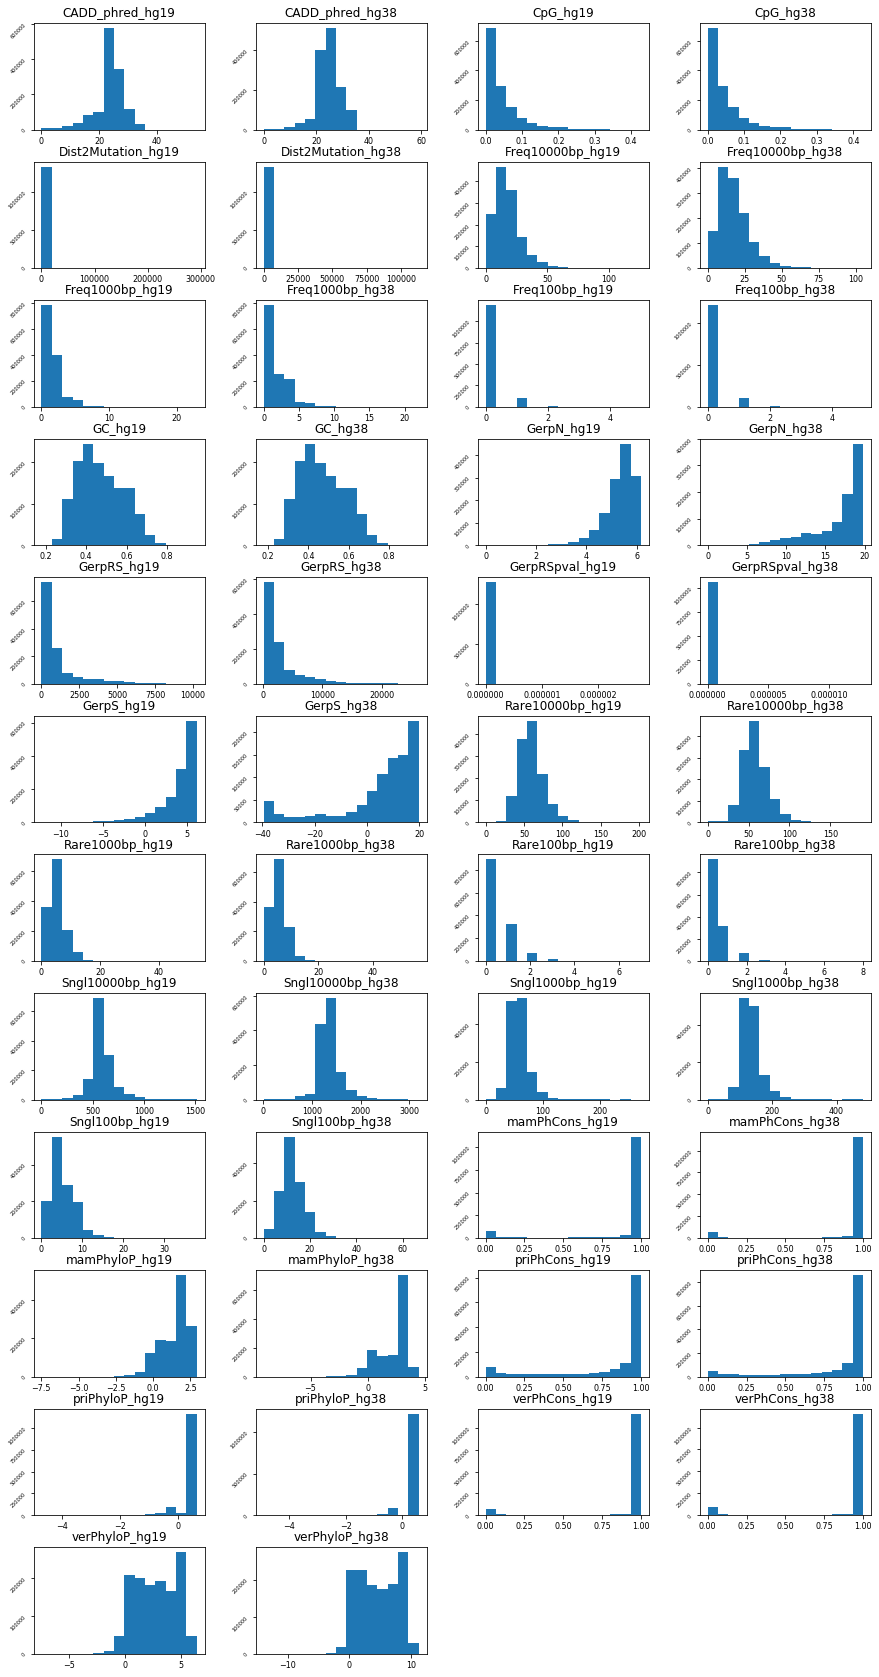

In [79]:
combo.hist(figsize=(15,30), layout=(12,4), grid=False, yrot=45, ylabelsize=5, xlabelsize=8, bins=15)
plt.savefig('COMBO_col_histogramgrid_notnormal.png')
plt.show()

# data is not normally distributed and does not have equal variance for all columns- 
options of using WILCOX or WELCH


<https://stats.stackexchange.com/questions/305/when-conducting-a-t-test-why-would-one-prefer-to-assume-or-test-for-equal-vari>
The second (older) recommendation is from Coombs et al. (1996, p. 148): "In summary, the independent samples t test is generally acceptable in terms of controlling Type I error rates provided there are sufficiently large equal-sized samples, even when the equal population variance assumption is violated. **For unequal-sized samples, however, an alternative that does not assume equal population variances is preferable.** Use the James second-order test when distributions are either short-tailed symmetric or normal. **Promising alternatives include the Wilcox H and Yuen trimmed means tests, which provide broader control of Type I error rates than either the Welch test or the James test and have greater power when data are long-tailed."**

> Coombs WT, Algina J, Oltman D. 1996. Univariate and multivariate omnibus hypothesis tests selected to control type I error rates when population variances are not necessarily equal. Rev Educ Res 66:137–79.

### scipy.stats.wilcoxon is the non parametric version of paired T test so not using becuase hg19 and hg38 are independent

### Welch T test from wiki:
<https://en.m.wikipedia.org/wiki/Welch%27s_t-test>
Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test,[1] and is more reliable when the two samples have unequal variances and/or unequal sample sizes.

In [ ]:
scipy.stats.ttest_ind(a, b, axis=0, equal_var=False)

In [70]:
phred38 = combo.CADD_phred_hg38
phred19 = combo.CADD_phred_hg19
scipy.stats.ttest_ind(phred38, phred19, equal_var=True)

Ttest_indResult(statistic=196.91757457180896, pvalue=0.0)

---
---
---




# R ODDS RATIO figure prep
1.5.2020

In [2]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/")

In [7]:
# combining AA pos specifc cadd max and avg to create DETECTED VS NOT DETECTED.
cdet = pd.read_csv("POSspecific_C_detected_maxmean_6057x2.csv")
cnot = pd.read_csv("POSspecific_C_notdetected_maxmean_34050x2.csv")

kdet = pd.read_csv("POSspecific_K_detected_maxmean_8868x2.csv")
knot = pd.read_csv("POSspecific_K_notdetected_maxmean_140652x2.csv")

In [8]:
cdet.head(2)

,Unnamed: 0,pos_ID,xref,Cys_reactivity,Cys_react_threshold,Cys_target_label,geneNamePrimary,CADD_avg,CADD_max,assembly
0,0,A0AVT1_C347,A0AVT1,2.08,Medium,Target,UBA6,22.555714,23.5,hg19
1,1,A0AVT1_C347,A0AVT1,2.08,Medium,Target,UBA6,21.804286,23.7,hg38


In [12]:
keepme = ['pos_ID', 'xref', 'CADD_avg', 'CADD_max',
       'assembly']

cdet = cdet[keepme].copy()
cnot = cnot[keepme].copy()

cdet['group'] = 'Labeled'
cnot['group'] = 'Unlabeled'

kdet = kdet[keepme].copy()
knot = knot[keepme].copy()

kdet['group'] = 'Labeled'
knot['group'] = 'Unlabeled'

cgroup = pd.concat([cdet, cnot], ignore_index=True, sort=False)
kgroup = pd.concat([kdet, knot], ignore_index=True, sort=False)

In [19]:
cdes = cgroup.describe()
cdes.to_csv("Cdescribe_hg19and38_labeled_unlabeled_CADDmaxavg.csv")

kdes = kgroup.describe()
kdes.to_csv("Kdescribe_hg19and38_labeled_unlabeled_CADDmaxavg.csv")

In [20]:
print(kdes)
print(cdes)

            CADD_avg       CADD_max
count  299040.000000  299040.000000
mean       24.125650      26.998326
std         4.074872       4.206454
min         0.019143       0.059000
25%        22.661429      24.400000
50%        24.542857      27.100000
75%        26.542857      29.700000
max        36.285714      57.000000
           CADD_avg      CADD_max
count  80214.000000  80214.000000
mean      24.927477     27.737884
std        5.071681      4.745007
min        0.036429      0.116000
25%       23.195357     24.900000
50%       25.885714     28.200000
75%       28.157143     32.000000
max       35.000000     59.000000


In [15]:
kgroup

,pos_ID,xref,CADD_avg,CADD_max,assembly,group
0,A0AVT1_K1014,A0AVT1,25.171429,32.0,hg19,Labeled
1,A0AVT1_K1014,A0AVT1,25.142857,32.0,hg38,Labeled
2,A0AVT1_K409,A0AVT1,25.600000,27.6,hg19,Labeled
3,A0AVT1_K409,A0AVT1,26.371429,29.2,hg38,Labeled
4,A0AVT1_K544,A0AVT1,25.700000,28.0,hg19,Labeled
...,...,...,...,...,...,...
299035,Q9Y6Y8_K938,Q9Y6Y8,26.885714,33.0,hg38,Unlabeled
299036,Q9Y6Y8_K955,Q9Y6Y8,25.128571,27.0,hg19,Unlabeled
299037,Q9Y6Y8_K955,Q9Y6Y8,28.528571,33.0,hg38,Unlabeled
299038,Q9Y6Y8_K985,Q9Y6Y8,25.914286,28.4,hg19,Unlabeled


In [16]:
299040/2

149520.0

In [17]:
cgroup

,pos_ID,xref,CADD_avg,CADD_max,assembly,group
0,A0AVT1_C347,A0AVT1,22.555714,23.5,hg19,Labeled
1,A0AVT1_C347,A0AVT1,21.804286,23.7,hg38,Labeled
2,A0AVT1_C433,A0AVT1,14.584000,22.6,hg19,Labeled
3,A0AVT1_C433,A0AVT1,19.221429,23.2,hg38,Labeled
4,A0AVT1_C546,A0AVT1,24.414286,28.3,hg19,Labeled
...,...,...,...,...,...,...
80209,Q9Y6Y8_C759,Q9Y6Y8,16.637143,21.3,hg38,Unlabeled
80210,Q9Y6Y8_C814,Q9Y6Y8,28.028571,29.9,hg19,Unlabeled
80211,Q9Y6Y8_C814,Q9Y6Y8,31.042857,34.0,hg38,Unlabeled
80212,Q9Y6Y8_C972,Q9Y6Y8,30.785714,33.0,hg19,Unlabeled


In [18]:
80214/2

40107.0

In [21]:
cgroup.to_csv("Rodds_C_labeled_unlabeled_CADDmaxavg_40107x2.csv", index=False)
kgroup.to_csv("Rodds_K_labeled_unlabeled_CADDmaxavg_14952x2.csv", index=False)

In [22]:
cdet_ls = list(set(cdet['xref']))
print(len(cdet_ls))

2824


In [23]:
kdet_ls = list(set(kdet['xref']))
print(len(kdet_ls))

2559


In [26]:
detlist = cdet_ls + kdet_ls
detlist = list(set(detlist))
print(len(detlist))

3840


# GENE level file filter with C and K detected IDs

In [24]:
ukbgnomad = pd.read_csv("UKBccds_addedColumns_gnomadTX_match_04_2019.csv")
ukbgnomad.head(3)

,ID,entryName,Length,proSequence,A,B,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,U,V,W,X,Y,Z,QuantA,QuantC,QuantD,QuantE,QuantF,QuantG,QuantH,QuantI,QuantK,QuantL,QuantM,QuantN,QuantP,QuantQ,QuantR,QuantS,QuantT,QuantV,QuantW,QuantY,Low_A,Low_C,Low_D,Low_E,Low_F,Low_G,Low_H,Low_I,Low_K,Low_L,Low_M,Low_N,Low_P,Low_Q,Low_R,Low_S,Low_T,Low_V,Low_W,Low_Y,Med_A,Med_C,Med_D,Med_E,Med_F,Med_G,Med_H,Med_I,Med_K,Med_L,Med_M,Med_N,Med_P,Med_Q,Med_R,Med_S,Med_T,Med_V,Med_W,Med_Y,High_A,High_C,High_D,High_E,High_F,High_G,High_H,High_I,High_K,High_L,High_M,High_N,High_P,High_Q,High_R,High_S,High_T,High_V,High_W,High_Y,gene,transcript,oe_mis,oe_syn,pLI,oe_lof,oe_syn_lower,oe_syn_upper,oe_mis_lower,oe_mis_upper,oe_lof_lower,oe_lof_upper,oe_lof_upper_rank,oe_lof_upper_bin,oe_lof_upper_bin_6,no_lofs,obs_het_lof,obs_hom_lof,exp_hom_lof,gene_id,exac_pLI,chromosome,start_position,end_position,pli_constrained,pli_mostconstrained,pli_verymostconstrained,oeLOF_bins,oeLOF0,LOEUF_bins,oemis_bins,oesyn_bins,LOEUF0,MOEUF0,SOEUF0
0,O95139,NDUB6_HUMAN,128,MTGYTPDEKLRLQQLRELRRRWLKDQELSPREPVLPPQKMGPMEKF...,0.0000,0,0.0000,0.0312,0.0859,0.0469,0.0469,0.0469,0.0547,0.1094,0.0781,0.0469,0.0156,0.1016,0.0391,0.0625,0.0391,0.0391,0.0,0.0781,0.0312,0,0.0469,0,0,0,0,2,2,0,2,2,2,0,2,0,2,1,1,0,0,2,2,2,True,True,True,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,True,False,False,False,False,True,True,True,NDUFB6,ENST00000379847,1.10320,1.35300,1.620100e-04,0.88786,1.015,1.793,0.909,1.346,0.483,1.668,16608.0,8,5,125727.0,16,0,0.000509,ENSG00000165264,0.047218,9,32552997,32573160,False,False,False,9,False,9,10,10,False,False,False
1,O75438,NDUB1_HUMAN,58,MVNLLQIVRDHWVHVLVPMGFVIGCYLDRKSDERLTAFRNKSMLFK...,0.0172,0,0.0172,0.0517,0.0690,0.0517,0.0345,0.0345,0.0345,0.0690,0.1207,0.0517,0.0345,0.0345,0.0345,0.0862,0.0517,0.0345,0.0,0.1207,0.0345,0,0.0172,0,0,1,1,1,2,0,2,0,2,2,2,1,0,0,2,0,0,2,2,0,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,True,False,False,True,True,False,NDUFB1,ENST00000329559,1.07320,1.15500,3.590800e-05,1.27590,0.845,1.599,0.882,1.313,0.668,1.897,18441.0,9,5,125730.0,15,0,0.000447,ENSG00000183648,0.311680,14,92582466,92588261,False,False,False,10,False,10,9,9,False,False,False
2,Q8N4C6,NIN_HUMAN,2090,MDEVEQDQHEARLKELFDSFDTTGTGSLGQEELTDLCHMLSLEEVA...,0.0440,0,0.0177,0.0392,0.1569,0.0187,0.0311,0.0297,0.0282,0.0742,0.1349,0.0244,0.0435,0.0206,0.0957,0.0560,0.0718,0.0478,0.0,0.0474,0.0072,0,0.0110,0,0,1,0,2,0,0,2,0,2,2,1,2,0,2,1,1,1,0,0,0,True,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,False,False,False,False,False,NIN,ENST00000382041,0.97176,0.93618,9.633500e-09,0.32452,0.861,1.018,0.923,1.023,0.248,0.429,3944.0,2,1,125652.0,95,1,0.018329,ENSG00000100503,0.000009,14,51186481,51297839,False,False,False,4,False,3,8,3,False,False,False


In [27]:
print(len(set(ukbgnomad['ID'])))
# adding labels for detected C and K to gnomad ukb file

ukblabeled = addcolumnconditional(detlist, ukbgnomad, 'ID', 'DetectedID')
ukblabeled = addcolumnconditional(cdet_ls, ukblabeled, 'ID', 'CysDetectedID')
ukblabeled = addcolumnconditional(kdet_ls, ukblabeled, 'ID', 'LysDetectedID')

print(ukblabeled.head(2))

16946
checking labeled column values: 
  DetectedID  Count
0      False  13220
1       True   3782

checking labeled column values: 
  CysDetectedID  Count
0         False  14221
1          True   2781

checking labeled column values: 
  LysDetectedID  Count
0         False  14473
1          True   2529

       ID    entryName  Length  \
0  O95139  NDUB6_HUMAN     128   
1  O75438  NDUB1_HUMAN      58   

                                         proSequence       A  B       C  \
0  MTGYTPDEKLRLQQLRELRRRWLKDQELSPREPVLPPQKMGPMEKF...  0.0000  0  0.0000   
1  MVNLLQIVRDHWVHVLVPMGFVIGCYLDRKSDERLTAFRNKSMLFK...  0.0172  0  0.0172   

        D       E       F       G       H       I       K       L       M  \
0  0.0312  0.0859  0.0469  0.0469  0.0469  0.0547  0.1094  0.0781  0.0469   
1  0.0517  0.0690  0.0517  0.0345  0.0345  0.0345  0.0690  0.1207  0.0517   

        N       P       Q       R       S       T    U       V       W  X  \
0  0.0156  0.1016  0.0391  0.0625  0.0391  0.0391  0.0  

In [29]:
# dropping proseq col and saving
ukblabeled= ukblabeled[['ID',  'Length', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U',
       'V', 'W', 'X', 'Y', 'Z', 'QuantA', 'QuantC', 'QuantD', 'QuantE',
       'QuantF', 'QuantG', 'QuantH', 'QuantI', 'QuantK', 'QuantL', 'QuantM',
       'QuantN', 'QuantP', 'QuantQ', 'QuantR', 'QuantS', 'QuantT', 'QuantV',
       'QuantW', 'QuantY', 'Low_A', 'Low_C', 'Low_D', 'Low_E', 'Low_F',
       'Low_G', 'Low_H', 'Low_I', 'Low_K', 'Low_L', 'Low_M', 'Low_N', 'Low_P',
       'Low_Q', 'Low_R', 'Low_S', 'Low_T', 'Low_V', 'Low_W', 'Low_Y', 'Med_A',
       'Med_C', 'Med_D', 'Med_E', 'Med_F', 'Med_G', 'Med_H', 'Med_I', 'Med_K',
       'Med_L', 'Med_M', 'Med_N', 'Med_P', 'Med_Q', 'Med_R', 'Med_S', 'Med_T',
       'Med_V', 'Med_W', 'Med_Y', 'High_A', 'High_C', 'High_D', 'High_E',
       'High_F', 'High_G', 'High_H', 'High_I', 'High_K', 'High_L', 'High_M',
       'High_N', 'High_P', 'High_Q', 'High_R', 'High_S', 'High_T', 'High_V',
       'High_W', 'High_Y', 'gene', 'transcript', 'oe_mis', 'oe_syn', 'pLI',
       'oe_lof', 'oe_syn_lower', 'oe_syn_upper', 'oe_mis_lower',
       'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'no_lofs', 'obs_het_lof',
       'obs_hom_lof', 'exp_hom_lof', 'gene_id', 'exac_pLI', 'chromosome',
       'start_position', 'end_position', 'pli_constrained',
       'pli_mostconstrained', 'pli_verymostconstrained', 'oeLOF_bins',
       'oeLOF0', 'LOEUF_bins', 'oemis_bins', 'oesyn_bins', 'LOEUF0', 'MOEUF0',
       'SOEUF0', 'DetectedID', 'CysDetectedID', 'LysDetectedID']].copy()
ukblabeled.to_csv("Rodds_gnomadconstraint_UKBabundance_labeled_notcols_16946IDs.csv", index=False)

# CADD MISSENSE change specific C and K subgroup R prep

In [35]:
cdet = pd.read_csv("CADDspecific_C_detected_104474x2.csv")
cnot = pd.read_csv("CADDspecific_C_notdetected_1222911x2.csv")
kdet = pd.read_csv("CADDspecific_K_detected_104474x2.csv")
knot = pd.read_csv("CADDspecific_K_notdetected_1222911x2.csv")

print(kdet.columns)
print()
print(knot.columns)

Index(['Unnamed: 0', 'pos_id19', 'pos_id38', 'xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID', 'Lys_reactivity',
       'Lys_react_threshold', 'Lys_target_label', 'geneNamePrimary',
       'CADD_score', 'assembly', 'posID14925'],
      dtype='object')

Index(['Unnamed: 0', 'pos_id19', 'pos_id38', 'xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID',
       'geneNamePrimary', 'CADD_score', 'assembly'],
      dtype='object')


In [37]:
# cys simplify col
keepme = ['xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID', 'Cys_reactivity',
       'Cys_react_threshold', 'Cys_target_label', 'geneNamePrimary',
       'CADD_score', 'assembly']
keepme2 = ['xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID',
       'geneNamePrimary', 'CADD_score', 'assembly']

# lysine simplify col
kkeepme = ['xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID', 'Lys_reactivity',
       'Lys_react_threshold', 'Lys_target_label', 'geneNamePrimary',
       'CADD_score', 'assembly']

cdet = cdet[keepme].copy()
cnot=cnot[keepme2].copy()
kdet = kdet[kkeepme].copy()
knot=knot[keepme2].copy()

In [38]:
cdet.head(2)

,xref,matched_target,lost_amino,gained_amino,Amino_acids,pos_ID,Cys_reactivity,Cys_react_threshold,Cys_target_label,geneNamePrimary,CADD_score,assembly
0,Q3ZCM7,C354,Cys,Trp,Cys/Trp,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,22.3,hg19
1,Q3ZCM7,C354,Cys,Phe,Cys/Phe,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,21.8,hg19


In [39]:
cnot.head(2)

,xref,matched_target,lost_amino,gained_amino,Amino_acids,pos_ID,geneNamePrimary,CADD_score,assembly
0,Q3ZCM7,False,Cys,Trp,Cys/Trp,Q3ZCM7_C211,TUBB8,22.1,hg19
1,Q3ZCM7,False,Cys,Phe,Cys/Phe,Q3ZCM7_C211,TUBB8,21.4,hg19


In [40]:
kdet.head(2)

,xref,matched_target,lost_amino,gained_amino,Amino_acids,pos_ID,Lys_reactivity,Lys_react_threshold,Lys_target_label,geneNamePrimary,CADD_score,assembly
0,Q9BZE4,K282,Lys,Gln,Lys/Gln,Q9BZE4_K282,1.2,High,NaN,GTPBP4,33.0,hg19
1,Q9BZE4,K282,Lys,Glu,Lys/Glu,Q9BZE4_K282,1.2,High,NaN,GTPBP4,33.0,hg19


In [41]:
Cresult = cdet.append(cnot, ignore_index=True, sort=False)
Kresult = kdet.append(knot, ignore_index=True, sort=False)

In [48]:
Cresult.to_csv("Rodds_missense_CysLOST_allgroups_280748x2.csv",index=False)
Kresult.to_csv("Rodds_missense_LysLOST_allgroups_1046638x2.csv", index=False)

In [44]:
Cresult.shape

(561496, 12)

In [45]:
561496/2 # total C missense both detected and not

280748.0

In [46]:
Kresult.shape

(2093276, 12)

In [47]:
2093276/2 # total K missense both detected and not

1046638.0

In [49]:
Cresult.sample(10)

,xref,matched_target,lost_amino,gained_amino,Amino_acids,pos_ID,Cys_reactivity,Cys_react_threshold,Cys_target_label,geneNamePrimary,CADD_score,assembly
173098,O75717,False,Cys,Ser,Cys/Ser,O75717_C264,NaN,NaN,NaN,WDHD1,26.400,hg19
265924,Q86TI2,False,Cys,Phe,Cys/Phe,Q86TI2_C259,NaN,NaN,NaN,DPP9,24.800,hg38
434007,O94979,False,Cys,Ser,Cys/Ser,O94979_C60,NaN,NaN,NaN,SEC31A,21.400,hg38
433171,Q8TF72,False,Cys,Trp,Cys/Trp,Q8TF72_C695,NaN,NaN,NaN,SHROOM3,8.924,hg38
396164,Q9NS91,False,Cys,Phe,Cys/Phe,Q9NS91_C424,NaN,NaN,NaN,RAD18,15.130,hg38
449487,P46821,False,Cys,Phe,Cys/Phe,P46821_C2088,NaN,NaN,NaN,MAP1B,32.000,hg19
32369,O95336,C237,Cys,Arg,Cys/Arg,O95336_C237,NaN,NaN,panReactive,PGLS,17.680,hg19
342621,O75362,False,Cys,Ser,Cys/Ser,O75362_C743,NaN,NaN,NaN,ZNF217,20.100,hg38
68337,Q15477,C247,Cys,Tyr,Cys/Tyr,Q15477_C247,NaN,NaN,panReactive,SKIV2L,20.100,hg19
368644,P50991,False,Cys,Arg,Cys/Arg,P50991_C221,NaN,NaN,NaN,CCT4,26.300,hg38


In [50]:
ukblabeled # gene level

,ID,Length,A,B,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,U,V,W,X,Y,Z,QuantA,QuantC,QuantD,QuantE,QuantF,QuantG,QuantH,QuantI,QuantK,QuantL,QuantM,QuantN,QuantP,QuantQ,QuantR,QuantS,QuantT,QuantV,QuantW,QuantY,Low_A,Low_C,Low_D,Low_E,Low_F,Low_G,Low_H,Low_I,Low_K,Low_L,Low_M,Low_N,Low_P,Low_Q,Low_R,Low_S,Low_T,Low_V,Low_W,Low_Y,Med_A,Med_C,Med_D,Med_E,Med_F,Med_G,Med_H,Med_I,Med_K,Med_L,Med_M,Med_N,Med_P,Med_Q,Med_R,Med_S,Med_T,Med_V,Med_W,Med_Y,High_A,High_C,High_D,High_E,High_F,High_G,High_H,High_I,High_K,High_L,High_M,High_N,High_P,High_Q,High_R,High_S,High_T,High_V,High_W,High_Y,gene,transcript,oe_mis,oe_syn,pLI,oe_lof,oe_syn_lower,oe_syn_upper,oe_mis_lower,oe_mis_upper,oe_lof_lower,oe_lof_upper,oe_lof_upper_rank,oe_lof_upper_bin,oe_lof_upper_bin_6,no_lofs,obs_het_lof,obs_hom_lof,exp_hom_lof,gene_id,exac_pLI,chromosome,start_position,end_position,pli_constrained,pli_mostconstrained,pli_verymostconstrained,oeLOF_bins,oeLOF0,LOEUF_bins,oemis_bins,oesyn_bins,LOEUF0,MOEUF0,SOEUF0,DetectedID,CysDetectedID,LysDetectedID
0,O95139,128,0.0000,0,0.0000,0.0312,0.0859,0.0469,0.0469,0.0469,0.0547,0.1094,0.0781,0.0469,0.0156,0.1016,0.0391,0.0625,0.0391,0.0391,0.0,0.0781,0.0312,0,0.0469,0,0,0,0,2,2,0,2,2,2,0,2,0,2,1,1,0,0,2,2,2,True,True,True,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,True,False,False,False,False,True,True,True,NDUFB6,ENST00000379847,1.10320,1.35300,1.620100e-04,0.887860,1.015,1.793,0.909,1.346,0.483,1.668,16608.0,8,5,125727.0,16,0,0.000509,ENSG00000165264,4.721800e-02,9,32552997,32573160,False,False,False,9,False,9,10,10,False,False,False,False,False,False
1,O75438,58,0.0172,0,0.0172,0.0517,0.0690,0.0517,0.0345,0.0345,0.0345,0.0690,0.1207,0.0517,0.0345,0.0345,0.0345,0.0862,0.0517,0.0345,0.0,0.1207,0.0345,0,0.0172,0,0,1,1,1,2,0,2,0,2,2,2,1,0,0,2,0,0,2,2,0,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,True,False,False,True,True,False,NDUFB1,ENST00000329559,1.07320,1.15500,3.590800e-05,1.275900,0.845,1.599,0.882,1.313,0.668,1.897,18441.0,9,5,125730.0,15,0,0.000447,ENSG00000183648,3.116800e-01,14,92582466,92588261,False,False,False,10,False,10,9,9,False,False,False,False,False,False
2,Q8N4C6,2090,0.0440,0,0.0177,0.0392,0.1569,0.0187,0.0311,0.0297,0.0282,0.0742,0.1349,0.0244,0.0435,0.0206,0.0957,0.0560,0.0718,0.0478,0.0,0.0474,0.0072,0,0.0110,0,0,1,0,2,0,0,2,0,2,2,1,2,0,2,1,1,1,0,0,0,True,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,False,False,False,False,False,NIN,ENST00000382041,0.97176,0.93618,9.633500e-09,0.324520,0.861,1.018,0.923,1.023,0.248,0.429,3944.0,2,1,125652.0,95,1,0.018329,ENSG00000100503,8.935500e-06,14,51186481,51297839,False,False,False,4,False,3,8,3,False,False,False,False,False,False
3,Q8IY84,436,0.0298,0,0.0138,0.0367,0.0917,0.0321,0.0757,0.0367,0.0688,0.0757,0.0894,0.0298,0.0275,0.0482,0.0367,0.0619,0.0757,0.0596,0.0,0.0688,0.0069,0,0.0344,0,0,0,0,2,1,2,2,2,2,1,2,0,1,0,1,1,2,2,0,2,True,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,True,True,True,True,False,True,False,False,False,False,False,True,True,False,True,NIM1K,ENST00000512796,0.98457,1.09510,2.900200e-12,0.977

In [55]:
checkColumnValues(ukblabeled, 'CysDetectedID')
'''
       True False
  True    861  2021
  False  1920 12200
'''

  CysDetectedID  Count
0         False  14221
1          True   2781


In [56]:
861+1920

2781

In [52]:
kgroup

,pos_ID,xref,CADD_avg,CADD_max,assembly,group
0,A0AVT1_K1014,A0AVT1,25.171429,32.0,hg19,Labeled
1,A0AVT1_K1014,A0AVT1,25.142857,32.0,hg38,Labeled
2,A0AVT1_K409,A0AVT1,25.600000,27.6,hg19,Labeled
3,A0AVT1_K409,A0AVT1,26.371429,29.2,hg38,Labeled
4,A0AVT1_K544,A0AVT1,25.700000,28.0,hg19,Labeled
...,...,...,...,...,...,...
299035,Q9Y6Y8_K938,Q9Y6Y8,26.885714,33.0,hg38,Unlabeled
299036,Q9Y6Y8_K955,Q9Y6Y8,25.128571,27.0,hg19,Unlabeled
299037,Q9Y6Y8_K955,Q9Y6Y8,28.528571,33.0,hg38,Unlabeled
299038,Q9Y6Y8_K985,Q9Y6Y8,25.914286,28.4,hg19,Unlabeled


In [53]:
Cresult

,xref,matched_target,lost_amino,gained_amino,Amino_acids,pos_ID,Cys_reactivity,Cys_react_threshold,Cys_target_label,geneNamePrimary,CADD_score,assembly
0,Q3ZCM7,C354,Cys,Trp,Cys/Trp,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,22.30,hg19
1,Q3ZCM7,C354,Cys,Phe,Cys/Phe,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,21.80,hg19
2,Q3ZCM7,C354,Cys,Ser,Cys/Ser,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,19.67,hg19
3,Q3ZCM7,C354,Cys,Tyr,Cys/Tyr,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,21.40,hg19
4,Q3ZCM7,C354,Cys,Gly,Cys/Gly,Q3ZCM7_C354,5.37,Low,NaN,TUBB8,20.70,hg19
...,...,...,...,...,...,...,...,...,...,...,...,...
561491,O14602,False,Cys,Gly,Cys/Gly,O14602_C59,NaN,NaN,NaN,EIF1AY,22.70,hg38
561492,O14602,False,Cys,Tyr,Cys/Tyr,O14602_C59,NaN,NaN,NaN,EIF1AY,24.40,hg38
561493,O14602,False,Cys,Ser,Cys/Ser,O14602_C59,NaN,NaN,NaN,EIF1AY,23.40,hg38
561494,O14602,False,Cys,Phe,Cys/Phe,O14602_C59,NaN,NaN,NaN,EIF1AY,25.10,hg38


In [54]:
letters = ['Low_A', 'Low_C', 'Low_D', 'Low_E', 'Low_F', 'Low_G', 'Low_H', 'Low_I', 'Low_K', 'Low_L', 'Low_M', 'Low_N', 'Low_P', 'Low_R', 'Low_S', 'Low_T', 'Low_V', 'Low_W', 'Low_Y', 'Med_A', 'Med_C', 'Med_D', 'Med_E', 'Med_F', 'Med_G', 'Med_H', 'Med_I', 'Med_K', 'Med_L', 'Med_M', 'Med_N', 'Med_P', 'Med_R', 'Med_S', 'Med_T', 'Med_V', 'Med_W', 'Med_Y', 'High_A', 'High_C', 'High_D', 'High_E', 'High_F', 'High_G', 'High_H', 'High_I', 'High_K', 'High_L', 'High_M', 'High_N', 'High_P', 'High_R', 'High_S', 'High_T', 'High_V', 'High_W', 'High_Y']
len(letters)

57

# missense specific for subgroups (reactive High vs LowMed & Target vs Panreactive)

In [7]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES")

In [8]:
det = pd.read_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475.csv", na_values='.', low_memory=False)
notdet = pd.read_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911.csv", na_values='.', low_memory=False)
# replaced '.' with nan values

In [37]:
# saving files with nan instead of '.' value
det.to_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475_fixednull.csv", index=False)
notdet.to_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911_fixednull.csv", index=False)

In [18]:
describeMe(det)

(104475, 143)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'rs_dbSNP151', 'Ensembl_transcriptid', 'cds_strand',
       'refcodon', 'codonpos', 'codon_degeneracy', 'SIFT_score',
       'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score',
       'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred',
       'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore',
       'Polyphen2_HVAR_pred', 'LRT_score', 'LRT_converted_rankscore',
       'LRT_pred', 'LRT_Omega', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationTaster_model', 'MutationTaste

In [10]:
uniqueCount(det, 'pos_ID')

len of col:  104475
len of col set:  14925



In [11]:
checkColumnValues(det, 'Cys_react_threshold')
checkColumnValues(det, 'Lys_react_threshold')

checkColumnValues(det, 'Cys_target_label')
checkColumnValues(det, 'Lys_target_label')
# matched excel table

  Cys_react_threshold  Count
0                 Low   6265
1              Medium   2884
2                High    658
  Lys_react_threshold  Count
0                 Low  23807
1              Medium   4620
2                High   2114
  Cys_target_label  Count
0      panReactive  35616
1           Target   4956
  Lys_target_label  Count
0      panReactive  54880
1           Target    805


In [12]:
# filtering for rows that dont have nan values in reactivity or pantarget col
react_cys = det[det['Cys_react_threshold'].notnull()]
print(react_cys.shape)

react_lys = det[det['Lys_react_threshold'].notnull()]
print(react_lys.shape)

pan_cys = det[det['Cys_target_label'].notnull()]
print(pan_cys.shape)

pan_lys = det[det['Lys_target_label'].notnull()]
print(pan_lys.shape)

(9807, 143)
(30541, 143)
(40572, 143)
(55685, 143)


In [13]:
describeMe(react_cys)
# DANN_score                                0
# fathmm-MKL_coding_score                   0
# fathmm-MKL_coding_rankscore               0

(9807, 143)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'rs_dbSNP151', 'Ensembl_transcriptid', 'cds_strand',
       'refcodon', 'codonpos', 'codon_degeneracy', 'SIFT_score',
       'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score',
       'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred',
       'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore',
       'Polyphen2_HVAR_pred', 'LRT_score', 'LRT_converted_rankscore',
       'LRT_pred', 'LRT_Omega', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationTaster_model', 'MutationTaster_

In [14]:
describeMe(react_lys)
# DANN_score                                0
# fathmm-MKL_coding_score                   0
# fathmm-MKL_coding_rankscore               0

(30541, 143)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'rs_dbSNP151', 'Ensembl_transcriptid', 'cds_strand',
       'refcodon', 'codonpos', 'codon_degeneracy', 'SIFT_score',
       'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score',
       'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred',
       'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore',
       'Polyphen2_HVAR_pred', 'LRT_score', 'LRT_converted_rankscore',
       'LRT_pred', 'LRT_Omega', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationTaster_model', 'MutationTaster

# for line plots with reactivity vs cadd raw scores, need to fill in 86 nan rows for reactive lysine set, cysteine has 0 nan values for CADD38 raw scores
- scores mapped from cadd files


In [17]:
nullcadd = react_lys[react_lys.RawScore_hg38.isnull()]
print(nullcadd.shape)
nullcadd.to_csv("reactive_lysine_nan86_forCADDrawscore38.csv", index=False)

(86, 143)


In [47]:
describeMe(pan_cys)
# DANN_score                                0
# DANN_rankscore                            0
# fathmm-MKL_coding_score                   0
# fathmm-MKL_coding_rankscore               0

(40572, 143)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'rs_dbSNP151', 'Ensembl_transcriptid', 'cds_strand',
       'refcodon', 'codonpos', 'codon_degeneracy', 'SIFT_score',
       'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score',
       'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred',
       'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore',
       'Polyphen2_HVAR_pred', 'LRT_score', 'LRT_converted_rankscore',
       'LRT_pred', 'LRT_Omega', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationTaster_model', 'MutationTaster

In [48]:
describeMe(pan_lys)
# DANN_score                                0
# DANN_rankscore                            0
# fathmm-MKL_coding_score                   0
# fathmm-MKL_coding_rankscore               0

(55685, 143)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'rs_dbSNP151', 'Ensembl_transcriptid', 'cds_strand',
       'refcodon', 'codonpos', 'codon_degeneracy', 'SIFT_score',
       'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score',
       'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred',
       'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore',
       'Polyphen2_HVAR_pred', 'LRT_score', 'LRT_converted_rankscore',
       'LRT_pred', 'LRT_Omega', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationTaster_model', 'MutationTaster

In [53]:
# new col for R label True is HIGH value and False if LOWMEDIUM
# new col for panreactive True if Target False if panreactive

def relabel_reactiveC(row):
    if row['Cys_react_threshold'] == "High":
        return 'True'
    if row['Cys_react_threshold'] == "Low":
        return 'False'
    if row['Cys_react_threshold'] == "Medium":
        return 'False'
    return 'Other'

def relabel_reactiveK(row):    
    if row['Lys_react_threshold'] == "High":
        return 'True'
    if row['Lys_react_threshold'] == "Low":
        return 'False'
    if row['Lys_react_threshold'] == "Medium":
        return 'False'
    return 'Other'

def relabel_targetC(row):
    if row['Cys_target_label'] == "Target":
        return 'True'
    if row['Cys_target_label'] == "panReactive":
        return 'False'
    return 'Other'


def relabel_targetK(row):    
    if row['Lys_target_label'] == "Target":
        return 'True'
    if row['Lys_target_label'] == "panReactive":
        return 'False'
    return 'Other'


react_cys['HIGH_subgroup'] = react_cys.apply(lambda row: relabel_reactiveC(row), axis=1)
react_lys['HIGH_subgroup'] = react_lys.apply(lambda row: relabel_reactiveK(row), axis=1)

pan_cys['TARGET_subgroup'] = pan_cys.apply(lambda row: relabel_targetC(row), axis=1)
pan_lys['TARGET_subgroup'] = pan_lys.apply(lambda row: relabel_targetK(row), axis=1)

/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [56]:
checkColumnValues(det, 'Cys_react_threshold')
checkColumnValues(det, 'Lys_react_threshold')

checkColumnValues(det, 'Cys_target_label')
checkColumnValues(det, 'Lys_target_label')
# matched excel table

  Cys_react_threshold  Count
0                 Low   6265
1              Medium   2884
2                High    658
  Lys_react_threshold  Count
0                 Low  23807
1              Medium   4620
2                High   2114
  Cys_target_label  Count
0      panReactive  35616
1           Target   4956
  Lys_target_label  Count
0      panReactive  54880
1           Target    805


In [55]:
# (9807, 143)
# (30541, 143)
# (40572, 143)
# (55685, 143)

checkColumnValues(react_cys, 'HIGH_subgroup')
checkColumnValues(react_lys, 'HIGH_subgroup')

checkColumnValues(pan_cys, 'TARGET_subgroup')
checkColumnValues(pan_lys, 'TARGET_subgroup')
# all True value counts correct!

  HIGH_subgroup  Count
0         False   9149
1          True    658
  HIGH_subgroup  Count
0         False  28427
1          True   2114
  TARGET_subgroup  Count
0           False  35616
1            True   4956
  TARGET_subgroup  Count
0           False  54880
1            True    805


In [58]:
react_cys.to_csv("Rodds_reactive_cys_HvsLM_9807missense.csv", index=False)

react_lys.to_csv("Rodds_reactive_lys_HvsLM_30541missense.csv", index=False)

pan_cys.to_csv("Rodds_pantarget_cys_TvsPR_40572missense.csv", index=False)

pan_lys.to_csv("Rodds_pantarget_lys_TvsPR_55685missense.csv", index=False)

In [82]:
react_cys_simple = react_cys[['pos_ID', 'matched_target',
       'matched_UKBID', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'DANN_score', 
       'fathmm-MKL_coding_score', 
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group','HIGH_subgroup']].copy()

react_cys_simple.columns = ['pos_ID', 'matched_target',
       'matched_UKBID', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'DANN_score', 
       'fathmmMKL_coding_score', 
       'fathmmMKL_coding_pred', 'fathmmMKL_coding_group','HIGH_subgroup']


In [83]:
react_lys_simple = react_lys[['pos_ID', 'matched_target',
       'matched_UKBID','aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label','DANN_score', 
       'fathmm-MKL_coding_score',
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group',
       'HIGH_subgroup']].copy()

react_lys_simple.columns = ['pos_ID', 'matched_target',
       'matched_UKBID','aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label','DANN_score', 
       'fathmmMKL_coding_score',
       'fathmmMKL_coding_pred', 'fathmmMKL_coding_group',
       'HIGH_subgroup']

In [84]:
pan_cys_simple = pan_cys[['pos_ID', 'matched_target',
       'matched_UKBID', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'DANN_score', 
       'fathmm-MKL_coding_score', 
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group','TARGET_subgroup']].copy()

pan_cys_simple.columns = ['pos_ID', 'matched_target',
       'matched_UKBID', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'DANN_score', 
       'fathmmMKL_coding_score', 
       'fathmmMKL_coding_pred', 'fathmmMKL_coding_group','TARGET_subgroup']

In [85]:
pan_lys_simple = pan_lys[['pos_ID', 'matched_target',
       'matched_UKBID','aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label','DANN_score', 
       'fathmm-MKL_coding_score',
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group','TARGET_subgroup']].copy()


pan_lys_simple.columns = ['pos_ID', 'matched_target',
       'matched_UKBID','aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label','DANN_score', 
       'fathmmMKL_coding_score',
       'fathmmMKL_coding_pred', 'fathmmMKL_coding_group','TARGET_subgroup']

In [86]:
react_cys_simple.to_csv("Rodds_selectCOL_reactive_cys_HvsLM_9807missense.csv", index=False)

react_lys_simple.to_csv("Rodds_selectCOL__reactive_lys_HvsLM_30541missense.csv", index=False)

pan_cys_simple.to_csv("Rodds_selectCOL__pantarget_cys_TvsPR_40572missense.csv", index=False)

pan_lys_simple.to_csv("Rodds_selectCOL__pantarget_lys_TvsPR_55685missense.csv", index=False)

In [73]:
saveColumnValues(react_cys_simple, 'Amino_acids', 'AAcounts_reactive_cys_9807.csv')
print()
saveColumnValues(react_lys_simple, 'Amino_acids', 'AAcounts_reactive_lys_30541.csv')
print()
saveColumnValues(pan_cys_simple, 'Amino_acids', 'AAcounts_pantarget_cys_40572.csv')
print()
saveColumnValues(pan_lys_simple, 'Amino_acids', 'AAcounts_pantarget_lys_55685.csv')

saved!

  Amino_acids  Count
0     Cys/Ser   2802
1     Cys/Trp   1401
2     Cys/Tyr   1401
3     Cys/Phe   1401
4     Cys/Gly   1401
5     Cys/Arg   1401

saved!

  Amino_acids  Count
0     Lys/Asn   8726
1     Lys/Gln   4363
2     Lys/Glu   4363
3     Lys/Arg   4363
4     Lys/Thr   4363
5     Lys/Met   2640
6     Lys/Ile   1723

saved!

  Amino_acids  Count
0     Cys/Ser  11592
1     Cys/Tyr   5796
2     Cys/Trp   5796
3     Cys/Phe   5796
4     Cys/Gly   5796
5     Cys/Arg   5796

saved!

  Amino_acids  Count
0     Lys/Asn  15910
1     Lys/Thr   7955
2     Lys/Gln   7955
3     Lys/Glu   7955
4     Lys/Arg   7955
5     Lys/Met   4732
6     Lys/Ile   3223


In [94]:
react_cys_simple.sample(10)

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
41298,Q9BRP1_C82,C82,Q9BRP1,C,F,Cys/Phe,14.75,12.98,1.77,3.95,Medium,Target,0.881067,0.03886,N,AEFDGBHCI,False
85046,Q04760_C61,C61,Q04760,C,Y,Cys/Tyr,15.76,15.84,-0.08,8.27,Low,panReactive,0.361821,0.84498,D,AEFBI,False
78139,P61247_C111,C111,P61247,C,F,Cys/Phe,24.10,19.03,5.07,5.25,Low,panReactive,0.937009,0.98435,D,AEFBCI,False
5912,O00303_C256,C256,O00303,C,S,Cys/Ser,23.50,22.30,1.20,5.80,Low,Target,0.761988,0.98816,D,AEFBCI,False
36799,P25705_C294,C294,P25705,C,W,Cys/Trp,32.00,26.00,6.00,4.12,Medium,Target,0.994014,0.93071,D,AEFBI,False
38599,Q15424_C225,C225,Q15424,C,R,Cys/Arg,24.30,23.90,0.40,10.79,Low,panReactive,0.978173,0.94563,D,AEFGI,False
13768,P07195_C294,C294,P07195,C,S,Cys/Ser,22.90,24.20,-1.30,6.24,Low,panReactive,0.987189,0.95949,D,AEFDGBHCI,False
29629,Q13509_C303,C303,Q13509,C,F,Cys/Phe,34.00,29.50,4.50,5.36,Low,NaN,0.984942,0.99424,D,AEFBI,False
57852,Q05639_C411,C411,Q05639,C,G,Cys/Gly,34.00,26.80,7.20,4.72,Medium,NaN,0.979383,0.88525,D,AEFDGBCI,False
87850,O95994_C81,C81,O95994,C,W,Cys/Trp,25.90,25.00,0.90,2.33,Medium,NaN,0.990027,0.91313,D,ALL,False


In [81]:
checkColumnValues(react_cys_simple, 'fathmm-MKL_coding_pred')

  fathmm-MKL_coding_pred  Count
0                      D   8297
1                      N   1510


In [112]:
react_cys_simple[react_cys_simple['CADD_phred_hg38'] >= 26]

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
106,Q01813_C179,C179,Q01813,C,R,Cys/Arg,26.3,25.1,1.2,2.20,Medium,Target,0.990211,0.94064,D,AEFBHCI,False
107,Q01813_C179,C179,Q01813,C,G,Cys/Gly,26.1,24.6,1.5,2.20,Medium,Target,0.962693,0.94789,D,AEFBHCI,False
108,Q01813_C179,C179,Q01813,C,Y,Cys/Tyr,27.1,25.1,2.0,2.20,Medium,Target,0.988312,0.96384,D,AEFBHCI,False
110,Q01813_C179,C179,Q01813,C,F,Cys/Phe,27.7,25.4,2.3,2.20,Medium,Target,0.991796,0.96671,D,AEFBHCI,False
364,A6NHL2_C354,C354,A6NHL2,C,W,Cys/Trp,28.3,23.2,5.1,4.68,Medium,NaN,0.992225,0.93967,D,AEFDBI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104376,Q00013_C242,C242,Q00013,C,S,Cys/Ser,26.0,24.8,1.2,7.15,Low,panReactive,0.993284,0.97025,D,AEFBCI,False
104377,Q00013_C179,C179,Q00013,C,W,Cys/Trp,26.8,25.6,1.2,4.70,Medium,Target,0.993266,0.93067,D,AEFDBCI,False
104381,Q00013_C179,C179,Q00013,C,G,Cys/Gly,27.5,26.0,1.5,4.70,Medium,Target,0.984040,0.96656,D,AEFDBCI,False
104382,Q00013_C179,C179,Q00013,C,R,Cys/Arg,27.6,26.5,1.1,4.70,Medium,Target,0.996228,0.96781,D,AEFDBCI,False


In [111]:
react_cys_simple[react_cys_simple['DANN_score'] >= 0.98]

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
106,Q01813_C179,C179,Q01813,C,R,Cys/Arg,26.30,25.1,1.20,2.20,Medium,Target,0.990211,0.94064,D,AEFBHCI,False
108,Q01813_C179,C179,Q01813,C,Y,Cys/Tyr,27.10,25.1,2.00,2.20,Medium,Target,0.988312,0.96384,D,AEFBHCI,False
110,Q01813_C179,C179,Q01813,C,F,Cys/Phe,27.70,25.4,2.30,2.20,Medium,Target,0.991796,0.96671,D,AEFBHCI,False
111,Q01813_C179,C179,Q01813,C,W,Cys/Trp,21.30,21.0,0.30,2.20,Medium,Target,0.980562,0.59787,D,AEFBHCI,False
339,P42330_C242,C242,P42330,C,Y,Cys/Tyr,19.17,17.4,1.77,7.48,Low,panReactive,0.980096,0.00287,N,AEFI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104379,Q00013_C179,C179,Q00013,C,S,Cys/Ser,25.30,26.7,-1.40,4.70,Medium,Target,0.995210,0.97456,D,AEFDBCI,False
104380,Q00013_C179,C179,Q00013,C,Y,Cys/Tyr,25.60,28.2,-2.60,4.70,Medium,Target,0.997546,0.96794,D,AEFDBCI,False
104381,Q00013_C179,C179,Q00013,C,G,Cys/Gly,27.50,26.0,1.50,4.70,Medium,Target,0.984040,0.96656,D,AEFDBCI,False
104382,Q00013_C179,C179,Q00013,C,R,Cys/Arg,27.60,26.5,1.10,4.70,Medium,Target,0.996228,0.96781,D,AEFDBCI,False


In [107]:
react_cys_simple[react_cys_simple['fathmmMKL_coding_score'] >= 0.95]

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
108,Q01813_C179,C179,Q01813,C,Y,Cys/Tyr,27.1,25.1,2.0,2.20,Medium,Target,0.988312,0.96384,D,AEFBHCI,False
109,Q01813_C179,C179,Q01813,C,S,Cys/Ser,24.6,23.3,1.3,2.20,Medium,Target,0.934915,0.96915,D,AEFBHCI,False
110,Q01813_C179,C179,Q01813,C,F,Cys/Phe,27.7,25.4,2.3,2.20,Medium,Target,0.991796,0.96671,D,AEFBHCI,False
365,A6NHL2_C354,C354,A6NHL2,C,F,Cys/Phe,24.7,22.5,2.2,4.68,Medium,NaN,0.992157,0.97283,D,AEFDBI,False
366,A6NHL2_C354,C354,A6NHL2,C,S,Cys/Ser,27.2,23.4,3.8,4.68,Medium,NaN,0.991060,0.98204,D,AEFDBI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104379,Q00013_C179,C179,Q00013,C,S,Cys/Ser,25.3,26.7,-1.4,4.70,Medium,Target,0.995210,0.97456,D,AEFDBCI,False
104380,Q00013_C179,C179,Q00013,C,Y,Cys/Tyr,25.6,28.2,-2.6,4.70,Medium,Target,0.997546,0.96794,D,AEFDBCI,False
104381,Q00013_C179,C179,Q00013,C,G,Cys/Gly,27.5,26.0,1.5,4.70,Medium,Target,0.984040,0.96656,D,AEFDBCI,False
104382,Q00013_C179,C179,Q00013,C,R,Cys/Arg,27.6,26.5,1.1,4.70,Medium,Target,0.996228,0.96781,D,AEFDBCI,False


In [89]:
react_cys_simple.shape

(9807, 17)